# Convolution in TensorFlow.
The motivation for this tutorial is to compare and contrast convolution in TensorFlow with convolution performed in 
typical signal processing. Typically Tensorflow is used to learn filters as apart of a convolutional neural network. These filters are generally smaller than the size of filters we are using here but the properties are the same. Also, which is additionally atypical, to start with we are not learning the filters but defining them ourselves. In TensorFlow you choose the values of filters before using them, whether it be random values before learning the kernel or a pre-defined kernel as in this tutorial. Here we generate the kernel ourselves and then use the TensorFlow framework to evaluate an image with it.



Populating the interactive namespace from numpy and matplotlib


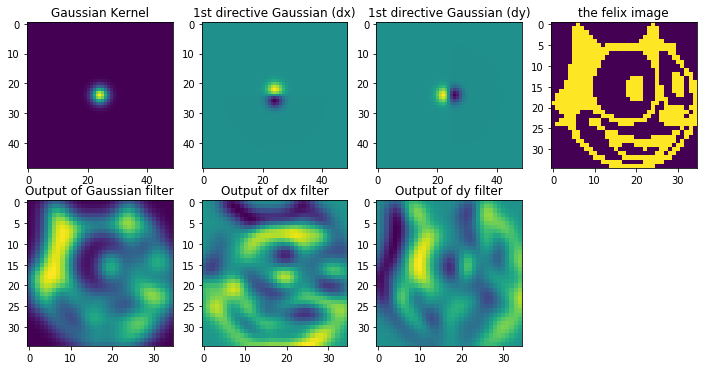

In [681]:
import numpy as np
%pylab inline
import tensorflow as tf
from scipy.ndimage.filters import convolve as sci_conv2d

## Just a little fun example for an input matrix. 
## Taken from http://www.uff.br/cdme/matrix/matrix-html/matrix_boolean/matrix_boolean_en.html
def text_file_to_import(file_path):
    input_arr = []
    f = open(file_path,'r')
    lines = f.readlines()
    for line in lines:
        input_arr.extend(line.split('\n')[0].split('\t'))
    return np.array(input_arr).reshape(35,35).astype(np.int32)
face_only = text_file_to_import('felix images/felix_face.txt')
smile_only = text_file_to_import('felix images/felix_smile.txt')
full_face = (255 - (face_only & smile_only)).astype(np.float32).reshape(1,
                                    face_only.shape[0],face_only.shape[1],1)


## This is for generating our kernels. This is the 2D Gaussian equation.
yy, xx = np.meshgrid(np.arange(-24,25),np.arange(-24,25))
sig1 = sig2 = 2.0
gauss = np.exp(-(yy**2.)/(2.*sig1**2.)-(xx**2.)/(2.*sig2**2.))
xd,yd = np.gradient(gauss) #This generates the 1st differative filters.


#We population a numpy matrix with kernels.
filters = np.zeros((gauss.shape[0],gauss.shape[1],1,3))
filters[:,:,0,0] = gauss
filters[:,:,0,1] = xd
filters[:,:,0,2] = yd


#Here we define our convolution kernel.
smooth_tensor = tf.nn.conv2d(full_face, filters, strides=[1,1,1,1], padding='SAME')

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
out1 = sess.run(smooth_tensor)

#plot our building blocks.
figure(figsize(12,6))
ax = subplot(2,4,1)
imshow(gauss)
ax.set_title('Gaussian Kernel')
ax = subplot(2,4,2)
imshow(xd)
ax.set_title('1st directive Gaussian (dx)')
ax = subplot(2,4,3)
imshow(yd)
ax.set_title('1st directive Gaussian (dy)')
ax = subplot(2,4,4)
ax.set_title('the felix image')
imshow(full_face[0,:,:,0])
ax = subplot(2,4,5)
ax.set_title('Output of Gaussian filter')
imshow(out1[0,:,:,0])
ax = subplot(2,4,6)
ax.set_title('Output of dx filter')
imshow(out1[0,:,:,1])
ax = subplot(2,4,7)
ax.set_title('Output of dy filter')
imshow(out1[0,:,:,2])

### Let us compare the output of the TensorFlow implementation with that of the scipy filters
Here we define a function called scipy_process, which uses the scipy ndimage filters convolve.
We compare the outputs of this with the outputs of the TensorFlow implementation. You will notice the Gaussian filter when subtracting the TensorFlow from the scipy implementation gives only noise as output. Not identically the same but very close, and close enough, to subsitute in general use. The other filters however have given quite different outputs. The reason these are giving different outputs is because they are non-symmetrical and have not been flipped which is the convention for convolution. For more details about this please refere to: https://en.wikipedia.org/wiki/Convolution.

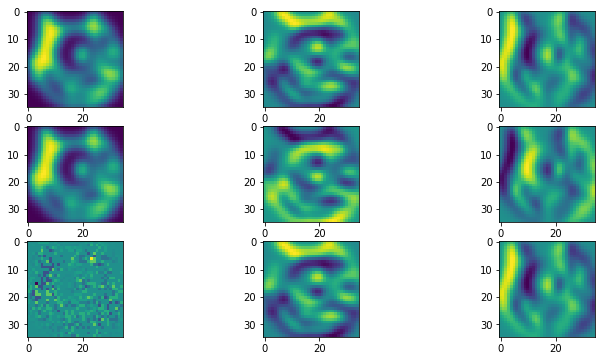

In [682]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
out = np.zeros((1,full_face.shape[1],full_face.shape[2],3))

def scipy_process(img, out):
    ##Does convolution with conventional high-performance library
    out[0,:,:,0] = sci_conv2d(img, gauss, mode='constant')
    out[0,:,:,1] = sci_conv2d(img, xd, mode='constant')
    out[0,:,:,2] = sci_conv2d(img, yd, mode='constant')
    return out
out0 = scipy_process(full_face[0,:,:,0],out)
out1 = sess.run(smooth_tensor)

figure(figsize(12,6))
subplot(3,3,1)
imshow(out0[0,:,:,0])
subplot(3,3,2)
imshow(out0[0,:,:,1])
subplot(3,3,3)
imshow(out0[0,:,:,2])
subplot(3,3,4)
imshow(out1[0,:,:,0])
subplot(3,3,5)
imshow(out1[0,:,:,1])
subplot(3,3,6)
imshow(out1[0,:,:,2])
subplot(3,3,7)
imshow((out0-out1)[0,:,:,0])
subplot(3,3,8)
imshow((out0-out1)[0,:,:,1])
subplot(3,3,9)
imshow((out0-out1)[0,:,:,2])



### So what happens when we flip the convolution kernel
This time we flip the kernel before defining the TensorFlow convolution operation. Now you can see when we subtract the different kernels you get noise as an output from all of them. This is good this means the output is effectively the same. TensorFlow doesn't flip the kernels as part of its methodology.

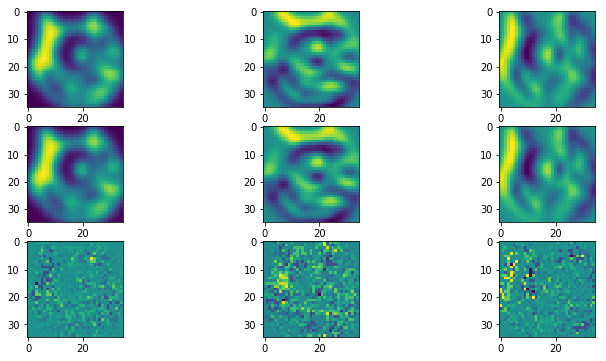

In [686]:

out0  = process(full_face[0,:,:,0],out)
filters = np.zeros((gauss.shape[0],gauss.shape[1],1,3))
filters[:,:,0,0] = gauss
filters[:,:,0,1] = np.flipud(xd)
filters[:,:,0,2] = np.fliplr(yd)
smooth_tensor = tf.nn.conv2d(full_face, filters, strides=[1,1,1,1], padding='SAME')
out1 = sess.run(smooth_tensor)

figure(figsize(12,6))
subplot(3,3,1)
imshow(out0[0,:,:,0])
subplot(3,3,2)
imshow(out0[0,:,:,1])
subplot(3,3,3)
imshow(out0[0,:,:,2])
subplot(3,3,4)
imshow(out1[0,:,:,0])
subplot(3,3,5)
imshow(out1[0,:,:,1])
subplot(3,3,6)
imshow(out1[0,:,:,2])
subplot(3,3,7)
imshow((out0-out1)[0,:,:,0])
subplot(3,3,8)
imshow((out0-out1)[0,:,:,1])
subplot(3,3,9)
imshow((out0-out1)[0,:,:,2])

### Just be clear its the kernels in the TensorFlow implementation that  are not flipped. 
What separates convolution from correlation is the flipping of the kernels.
Tensorflow doesn't flip the kernels and so effectively is correlation when compared
to conventional convolution.

### Speed test. Whow. TensorFlow method is far faster x1000!
The TensorFlow implementation is more effort to construct, but the reward is much more speed.

In [83]:
out = np.zeros((1,full_face.shape[1],full_face.shape[2],3))
%timeit out0  = process(full_face[0,:,:,0],out)#scipy
%timeit out1 = sess.run(smooth_tensor)#TensorFlow

49.7 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.6 ms ± 140 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [670]:
input_a = out0[:,:,:,:].reshape(1,out0.shape[1],out0.shape[2],3)

In [671]:
tf.reset_default_graph()#Clears all variables.
sess = tf.InteractiveSession()#Start a new session.

In [672]:
rand_filter = tf.Variable(tf.truncated_normal([15, 15, 1, 3], stddev=0.1))
inputI = tf.Variable(full_face.astype(np.float32))#This is our felix face unblurred.
labels = tf.Variable(input_a.astype(np.float32))#This is the ground-truth blurred image

#Here we define our convolution kernel.
smooth_tensor = tf.nn.conv2d(inputI, rand_filter, strides=[1,1,1,1], padding='SAME')


In [673]:
loss = tf.reduce_mean(tf.square(tf.subtract(labels,smooth_tensor)))
learning_rate = 0.002
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=0.99,beta2=0.999).minimize(loss)

sess.run(tf.global_variables_initializer())

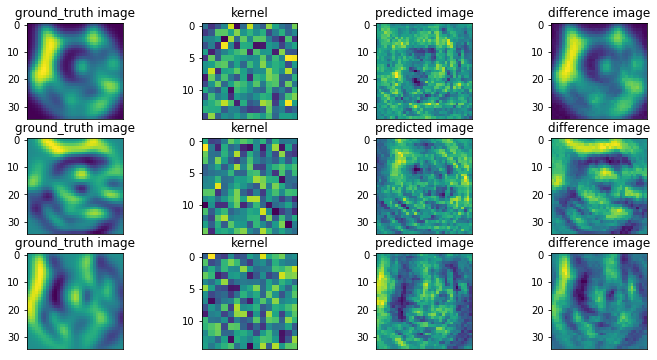

In [674]:
ground_truth = sess.run(labels)[0,:,:,:]
prediction = sess.run(smooth_tensor)[0,:,:,:]
diff_img = ground_truth - prediction
c =1;
for i in range(0,3):
    ax = subplot(3,4,c);c+=1
    ax.set_title('ground_truth image')
    imshow(ground_truth[:,:,i])
    ax.get_xaxis().set_visible(False)
    ax = subplot(3,4,c);c+=1
    ax.set_title('kernel')
    ax.get_xaxis().set_visible(False)
    imshow(sess.run(rand_filter)[:,:,0,i])
    ax = subplot(3,4,c);c+=1
    ax.set_title('predicted image')
    ax.get_xaxis().set_visible(False)
    imshow(prediction[:,:,i])
    ax = subplot(3,4,c);c+=1
    ax.set_title('difference image')
    ax.get_xaxis().set_visible(False)
    imshow(diff_img[:,:,i])

In [675]:
#Our optimisation.
loss_arr = []
for epoch in range(0,10000):
    
    out = sess.run(optimizer)
    loss_arr.append(loss.eval())
    if epoch %500 == 0:
        print('epoch: ',epoch,'loss',loss_arr[-1])
print('final loss',loss_arr[-1])

epoch:  0 loss 2.66762e+06
epoch:  500 loss 41172.7
epoch:  1000 loss 6158.02
epoch:  1500 loss 1948.36
epoch:  2000 loss 808.317
epoch:  2500 loss 417.013
epoch:  3000 loss 237.036
epoch:  3500 loss 132.947
epoch:  4000 loss 70.0379
epoch:  4500 loss 33.8351
epoch:  5000 loss 14.7362
epoch:  5500 loss 5.7305
epoch:  6000 loss 2.01706
epoch:  6500 loss 0.701055
epoch:  7000 loss 0.295287
epoch:  7500 loss 0.170684
epoch:  8000 loss 0.120581
epoch:  8500 loss 0.0905003
epoch:  9000 loss 0.0675008
epoch:  9500 loss 0.0920642
final loss 0.0501089


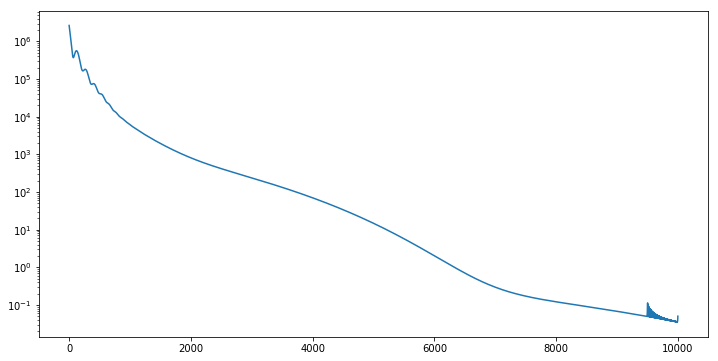

In [676]:
#Our loss function visualised.
semilogy(loss_arr)

## Our Final comparison
The difference images show how close the learnt filters are to the filters used to create the ground-truth images. The predicted images look identical to the ground-truth images.

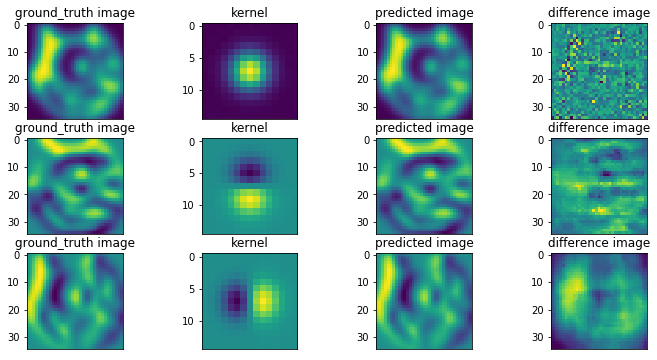

In [679]:
ground_truth = sess.run(labels)[0,:,:,:]
prediction = sess.run(smooth_tensor)[0,:,:,:]
diff_img = ground_truth - prediction
c =1;
for i in range(0,3):
    ax = subplot(3,4,c);c+=1
    ax.set_title('ground_truth image')
    imshow(ground_truth[:,:,i])
    ax.get_xaxis().set_visible(False)
    ax = subplot(3,4,c);c+=1
    ax.set_title('kernel')
    ax.get_xaxis().set_visible(False)
    imshow(sess.run(rand_filter)[:,:,0,i])
    ax = subplot(3,4,c);c+=1
    ax.set_title('predicted image')
    ax.get_xaxis().set_visible(False)
    imshow(prediction[:,:,i])
    ax = subplot(3,4,c);c+=1
    ax.set_title('difference image')
    ax.get_xaxis().set_visible(False)
    imshow(diff_img[:,:,i])


The learnt filters are almost identical the ones we created programmatically earlier, but again notice that they are mirrors of the original filters. If I wanted to use these for another conventional convolution task I would have to flip them.